<h1>Question no1</h1>

<h4>Works to do</h4>
<ul>
    <li>Determine categorical & numerical features</li>
    <li>Normalize numerical features</li>
</ul>
<h4>Categorical features</h4>
<ul>
    <li>WorkClass</li>
    <li>Education</li>
    <li>Marital-Status</li>
    <li>Occupation</li>
    <li>Relationship</li>
    <li>Race</li>
    <li>Gender</li>
    <li>NAtive-Country</li>
</ul>
<h4>Numerical features</h4>
<ul>
    <li>age</li>
    <li>fnlwgt</li>
    <li>Educational-num</li>
    <li>Hours-per-week</li>
</ul>
<p><b>Normalization Method:</b> Standard normalization applied on data which transforms data to new numbers with mean of zerp and standard devietion of 1</p>

<h2>Imports</h2>
<ul>
    <li>Pandas</li>
    <li>Numpy</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scikit-Learn</li>
</ul>

In [50]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy

# Scikit-Learn's imports
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<h4>Load data</h4>

In [5]:
# Load test & train data
data_train = pd.read_csv('./Dataset/train_set.csv')
data_test = pd.read_csv('./Dataset/test_set.csv')

<h4>Get numerical features</h4>

In [6]:
train_numerical = data_train[['age', 'fnlwgt', 'educational-num', 'hours-per-week']]
test_numerical = data_test[['age', 'fnlwgt', 'educational-num', 'hours-per-week']]

# Normalize
scalar = StandardScaler()
normalized_train_data_partial = pd.DataFrame(scalar.fit_transform(train_numerical), columns=['age', 'fnlwgt', 'educational-num', 'hours-per-week'])
normalized_test_data_partial = pd.DataFrame(scalar.fit_transform(test_numerical), columns=['age', 'fnlwgt', 'educational-num', 'hours-per-week'])

# Make normalized test & train data
# Train data
normalized_train_data = copy.deepcopy(data_train)
for col in normalized_train_data_partial.columns:
    normalized_train_data[col] = copy.deepcopy(normalized_train_data_partial[col])

# Test data
normalized_test_data = copy.deepcopy(data_test)
for col in normalized_test_data_partial.columns:
    normalized_test_data[col] = copy.deepcopy(normalized_test_data_partial[col])

<h4>Train data after normalization</h4>

In [7]:
normalized_train_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-0.120422,Private,-0.465486,Some-college,-0.027079,Married-civ-spouse,Sales,Wife,White,Female,-0.034380,United-States,>50K
1,1.709353,Private,-1.455485,Some-college,-0.027079,Married-civ-spouse,Transport-moving,Husband,White,Male,1.587134,United-States,<=50K
2,-0.632759,Private,0.004908,HS-grad,-0.416222,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.034380,United-States,>50K
3,2.002117,Federal-gov,-1.346235,10th,-1.583650,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.034380,United-States,<=50K
4,2.221690,Self-emp-not-inc,-0.180407,HS-grad,-0.416222,Married-civ-spouse,Sales,Husband,White,Male,0.614225,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,1.416589,Self-emp-inc,0.007286,Bachelors,1.140350,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.034380,United-States,>50K
22788,0.904252,?,-0.132195,HS-grad,-0.416222,Married-civ-spouse,?,Husband,White,Male,-0.034380,United-States,<=50K
22789,-0.193613,Private,-0.348515,Some-college,-0.027079,Married-civ-spouse,Craft-repair,Husband,White,Male,0.776377,United-States,>50K
22790,0.757870,Self-emp-not-inc,1.770947,Assoc-acdm,0.751207,Divorced,Sales,Not-in-family,White,Male,0.776377,United-States,<=50K


<h4>Test data after normalization</h4>

In [8]:
normalized_test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,-0.326298,Local-gov,0.353844,Bachelors,1.121784,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.037869,United-States
1,1.440219,?,1.649905,HS-grad,-0.429013,Married-civ-spouse,?,Husband,Black,Male,-0.845776,United-States
2,-0.473508,Private,-1.363144,Bachelors,1.121784,Never-married,Adm-clerical,Not-in-family,White,Female,-0.037869,United-States
3,-1.356767,?,-0.068498,Some-college,-0.041314,Never-married,?,Own-child,White,Male,-0.037869,United-States
4,-0.767928,Private,-0.891569,Bachelors,1.121784,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.770038,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-1.135952,Private,2.087878,9th,-1.979810,Never-married,Machine-op-inspct,Other-relative,White,Female,-0.037869,Mexico
9765,2.102663,?,-0.136583,Some-college,-0.041314,Married-civ-spouse,?,Husband,White,Male,-0.037869,United-States
9766,-0.841532,Federal-gov,0.239977,HS-grad,-0.429013,Never-married,Adm-clerical,Not-in-family,Black,Female,-0.037869,United-States
9767,0.115331,Private,0.934239,Prof-school,1.897182,Married-civ-spouse,Prof-specialty,Husband,White,Male,1.173992,Germany


<h1>Question no2</h1>

<h4>Wroks to do</h4>
<ul>
    <li>Pre-processing</li>
    <ul>
        <li>Handle categorical features</li>
        <li>Handle missing values</li>
    </ul>
    <li>Training part</li>
    <ul>
        <li>Apply Logistic Regression</li>
        <li>Change parameters</li>
        <li>Choose best model</li>
        <li>apply best model on test data</li>
    </ul>
    <li>Report results</li>
    <ul>
        <li>Plot boxplots of results</li>
        <li>Save predictions</li>
    </ul>
</ul>

<h4>Pre-processing</h4>
Handle categorical features using label encoding

In [9]:
# Define categorical features
categorical_features_train = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
categorical_features_test = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Handle categorical features in train data
encoder = LabelEncoder()
# Train data
for col in categorical_features_train:
    normalized_train_data[col] = copy.deepcopy(encoder.fit_transform(normalized_train_data[col]))

# Test data
for col in categorical_features_test:
    normalized_test_data[col] = copy.deepcopy(encoder.fit_transform(normalized_test_data[col]))

Train data after handling categorical features

In [10]:
normalized_train_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-0.120422,4,-0.465486,15,-0.027079,2,12,5,4,0,-0.034380,39,1
1,1.709353,4,-1.455485,15,-0.027079,2,14,0,4,1,1.587134,39,0
2,-0.632759,4,0.004908,11,-0.416222,2,7,0,4,1,-0.034380,39,1
3,2.002117,1,-1.346235,0,-1.583650,2,3,0,4,1,-0.034380,39,0
4,2.221690,6,-0.180407,11,-0.416222,2,12,0,4,1,0.614225,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,1.416589,5,0.007286,9,1.140350,2,10,0,4,1,-0.034380,39,1
22788,0.904252,0,-0.132195,11,-0.416222,2,0,0,4,1,-0.034380,39,0
22789,-0.193613,4,-0.348515,15,-0.027079,2,3,0,4,1,0.776377,39,1
22790,0.757870,6,1.770947,7,0.751207,0,12,1,4,1,0.776377,39,0


Test data after handling categorical features

In [11]:
normalized_test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,-0.326298,2,0.353844,9,1.121784,2,11,0,4,1,-0.037869,38
1,1.440219,0,1.649905,11,-0.429013,2,0,0,2,1,-0.845776,38
2,-0.473508,4,-1.363144,9,1.121784,4,1,1,4,0,-0.037869,38
3,-1.356767,0,-0.068498,15,-0.041314,4,0,3,4,1,-0.037869,38
4,-0.767928,4,-0.891569,9,1.121784,2,4,5,4,0,0.770038,38
...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-1.135952,4,2.087878,6,-1.979810,4,7,2,4,0,-0.037869,25
9765,2.102663,0,-0.136583,15,-0.041314,2,0,0,4,1,-0.037869,38
9766,-0.841532,1,0.239977,11,-0.429013,4,1,1,2,0,-0.037869,38
9767,0.115331,4,0.934239,14,1.897182,2,10,0,4,1,1.173992,11


<h4>Pre-processing</h4>
<p>Handle missing values</p>

In [12]:
# Convert ? marks to NAN
# train data
for col in normalized_train_data.columns:
    for index, val in normalized_train_data[col].items():
        if type(val) == str:
            if val.strip() == '?':
                normalized_train_data[col][index] = np.NAN

# Test data
for col in normalized_test_data.columns:
    for index, val in normalized_test_data[col].items():
        if type(val) == str:
            if val.strip() == '?':
                normalized_test_data[col][index] = np.NAN

# Handle Missing values
# Train data
imputer = KNNImputer(n_neighbors=3)
train_imputed = pd.DataFrame(imputer.fit_transform(normalized_train_data), columns=normalized_train_data.columns)

# Test data
test_imputed = pd.DataFrame(imputer.fit_transform(normalized_test_data), columns=normalized_test_data.columns)

In [13]:
train_imputed

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-0.120422,4.0,-0.465486,15.0,-0.027079,2.0,12.0,5.0,4.0,0.0,-0.034380,39.0,1.0
1,1.709353,4.0,-1.455485,15.0,-0.027079,2.0,14.0,0.0,4.0,1.0,1.587134,39.0,0.0
2,-0.632759,4.0,0.004908,11.0,-0.416222,2.0,7.0,0.0,4.0,1.0,-0.034380,39.0,1.0
3,2.002117,1.0,-1.346235,0.0,-1.583650,2.0,3.0,0.0,4.0,1.0,-0.034380,39.0,0.0
4,2.221690,6.0,-0.180407,11.0,-0.416222,2.0,12.0,0.0,4.0,1.0,0.614225,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,1.416589,5.0,0.007286,9.0,1.140350,2.0,10.0,0.0,4.0,1.0,-0.034380,39.0,1.0
22788,0.904252,0.0,-0.132195,11.0,-0.416222,2.0,0.0,0.0,4.0,1.0,-0.034380,39.0,0.0
22789,-0.193613,4.0,-0.348515,15.0,-0.027079,2.0,3.0,0.0,4.0,1.0,0.776377,39.0,1.0
22790,0.757870,6.0,1.770947,7.0,0.751207,0.0,12.0,1.0,4.0,1.0,0.776377,39.0,0.0


<h4>Seperate labels</h4>

In [14]:
y_train = pd.DataFrame(train_imputed['income'].astype(int))
X_train = copy.deepcopy(train_imputed)
X_train = X_train.drop(columns=['income'])

<h4>Prepare test data</h4>

In [15]:
X_test = pd.DataFrame(test_imputed)

<h4>Training part</h4>
Using gridSearch to find the best model

In [16]:
# Apply Logistic Regression
rcfv = RepeatedKFold(n_repeats=2, n_splits=5, random_state=1) # Define repeated k fold cross validation

# Define linear model to classify with
sgd = SGDClassifier(penalty=None, loss='log_loss')
# log_reg = LogisticRegression(solver='saga', penalty=None, multi_class='multinomial') # Penalty sets to NONE which disables all regularizations, when multi_class parameter sets to multi

# Define desired hyper parameters
param_grid = {
    'eta0': [1, 1e-2, 1e-5],  # Learning rates
    'alpha': [0, 1e-2, 1e-5],  # Regularization rates
    'max_iter': [500, 1000, 2000],  # Maximum iterations
    'learning_rate': ['constant']  # Using constant learning rate
}

# Apply grid search
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, n_jobs=-1, cv=rcfv, scoring=['precision_weighted', 'recall_weighted', 'f1_weighted', 'accuracy'], refit='accuracy' , return_train_score=True)
grid_search.fit(X_train, y_train)

e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no5\.env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=SGDClassifier(loss='log_loss', penalty=None), n_jobs=-1,
             param_grid={'alpha': [0, 0.01, 1e-05], 'eta0': [1, 0.01, 1e-05],
                         'learning_rate': ['constant'],
                         'max_iter': [500, 1000, 2000]},
             refit='accuracy', return_train_score=True,
             scoring=['precision_weighted', 'recall_weighted', 'f1_weighted',
                      'accuracy'])

<h4>Results of GridSearch</h4>

In [17]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_max_iter,params,split0_test_precision_weighted,...,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.150570,0.028434,0.100299,0.028475,0,1,constant,500,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.764189,...,0.781452,0.404958,0.683668,0.760050,0.800746,0.526873,0.799825,0.770045,0.706187,0.127017
1,0.217863,0.080440,0.097008,0.021063,0,1,constant,1000,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.786970,...,0.658385,0.782988,0.756225,0.765480,0.785279,0.757870,0.798947,0.771471,0.763821,0.038162
2,0.114733,0.044494,0.051381,0.015022,0,1,constant,2000,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.774980,...,0.601020,0.803883,0.761106,0.346789,0.500027,0.761983,0.783865,0.789295,0.655430,0.160629
3,0.101355,0.042186,0.062721,0.017344,0,0.01,constant,500,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.786757,...,0.775639,0.793024,0.738730,0.760983,0.465255,0.800976,0.792750,0.493364,0.711214,0.119830
4,0.086934,0.018011,0.051358,0.004702,0,0.01,constant,1000,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.810385,...,0.575080,0.734123,0.802567,0.632863,0.794877,0.785730,0.766316,0.804651,0.733722,0.077283
5,0.113394,0.032078,0.056794,0.009819,0,0.01,constant,2000,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.790232,...,0.762532,0.504278,0.639191,0.329896,0.770087,0.773226,0.788308,0.673138,0.638122,0.174032
6,0.195086,0.031378,0.039326,0.006258,0,0.00001,constant,500,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.779817,...,0.800373,0.797192,0.787649,0.791971,0.785005,0.785182,0.790501,0.788198,0.790003,0.004905
7,0.242759,0.064971,0.054251,0.016982,0,0.00001,constant,1000,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.783405,...,0.796808,0.792092,0.791159,0.785279,0.791806,0.787320,0.795876,0.794834,0.792027,0.003419
8,0.378770,0.108736,0.100844,0.034004,0,0.00001,constant,2000,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.780423,...,0.793902,0.792914,0.791543,0.793287,0.789338,0.788582,0.788417,0.801579,0.791923,0.003747
9,0.182763,0.062978,0.098061,0.025301,0.01,1,constant,500,"{'alpha': 0.01, 'eta0': 1, 'learning_rate': 'c...",0.776000,...,0.796315,0.795986,0.761051,0.554489,0.768881,0.763464,0.761051,0.461775,0.725216,0.111437


<h4>Boxplots</h4>
<p><b>NOTE:</b> As you can see in the plot, all the 10 splits for each of 9 combinations has 100 percent acccuracy, so we have to calculate another evaluation metric</p>

<h4>Accuracy Score box plots</h4>

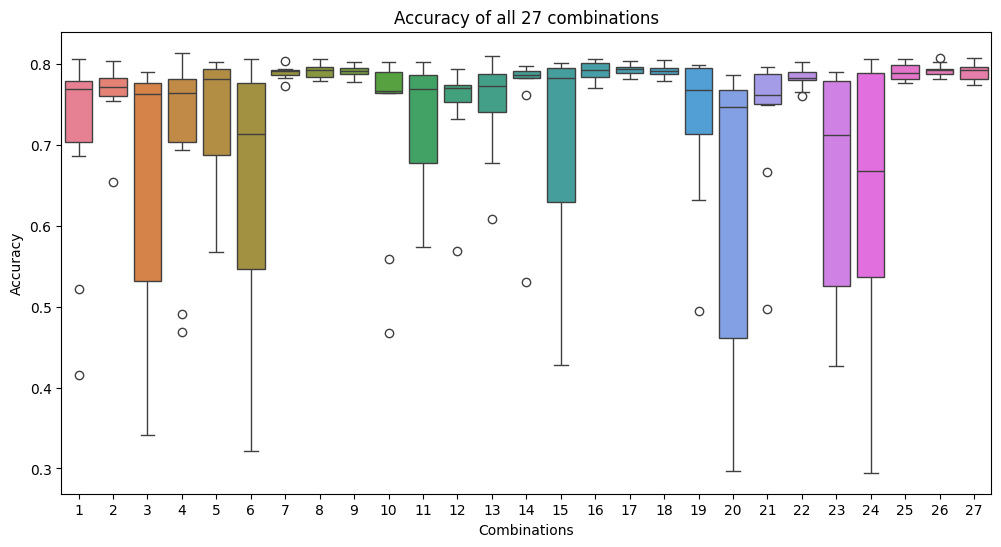

In [18]:
results = pd.DataFrame(grid_search.cv_results_)[['split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy']]
plt.figure(figsize=(12, 6))
models = pd.DataFrame([results[col] for col in results.columns])
sb.boxplot(models)
plt.title("Accuracy of all 27 combinations")
plt.xlabel('Combinations')
plt.ylabel('Accuracy')
plt.xticks(ticks=[i for i in range(27)], labels=[f'{i}' for i in range(1, 28)])
plt.show()

<h4>Precision Score box plots</h4>

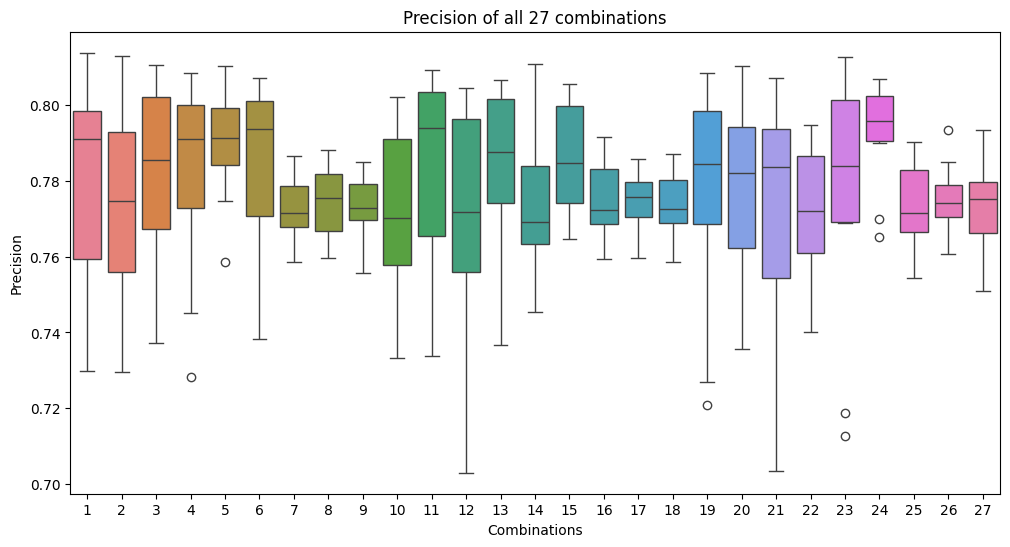

In [19]:
results = pd.DataFrame(grid_search.cv_results_)[['split0_test_precision_weighted', 'split1_test_precision_weighted', 'split2_test_precision_weighted', 'split3_test_precision_weighted', 'split4_test_precision_weighted', 'split5_test_precision_weighted', 'split6_test_precision_weighted', 'split7_test_precision_weighted', 'split8_test_precision_weighted', 'split9_test_precision_weighted']]
plt.figure(figsize=(12, 6))
models = pd.DataFrame([results[col] for col in results.columns])
sb.boxplot(models)
plt.title("Precision of all 27 combinations")
plt.xlabel('Combinations')
plt.ylabel('Precision')
plt.xticks(ticks=[i for i in range(27)], labels=[f'{i}' for i in range(1, 28)])
plt.show()

<h4>Recall Score box plots</h4>

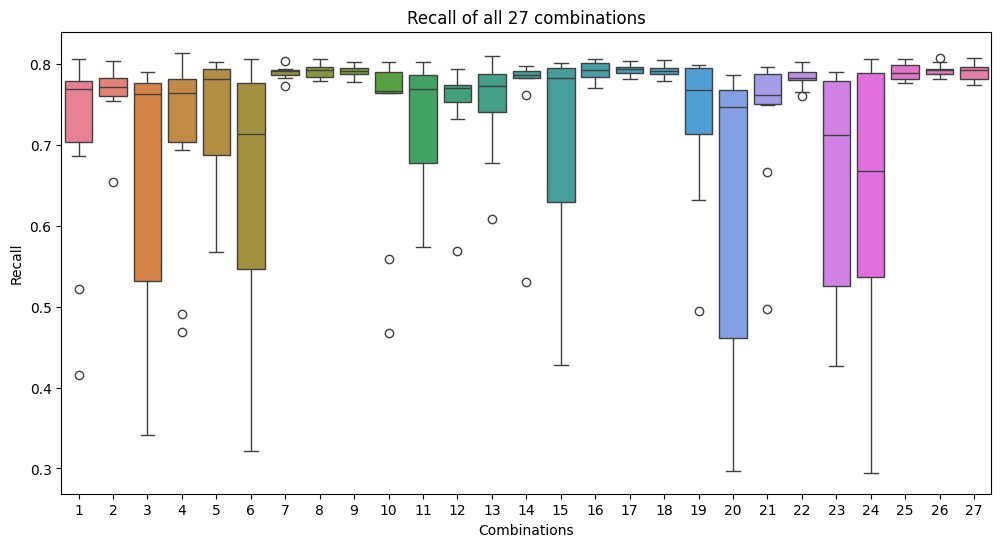

In [20]:
results = pd.DataFrame(grid_search.cv_results_)[['split0_test_recall_weighted', 'split1_test_recall_weighted', 'split2_test_recall_weighted', 'split3_test_recall_weighted', 'split4_test_recall_weighted', 'split5_test_recall_weighted', 'split6_test_recall_weighted', 'split7_test_recall_weighted', 'split8_test_recall_weighted', 'split9_test_recall_weighted']]
plt.figure(figsize=(12, 6))
models = pd.DataFrame([results[col] for col in results.columns])
sb.boxplot(models)
plt.title("Recall of all 27 combinations")
plt.xlabel('Combinations')
plt.ylabel('Recall')
plt.xticks(ticks=[i for i in range(27)], labels=[f'{i}' for i in range(1, 28)])
plt.show()

<h4>F1 Score boxplots</h4>

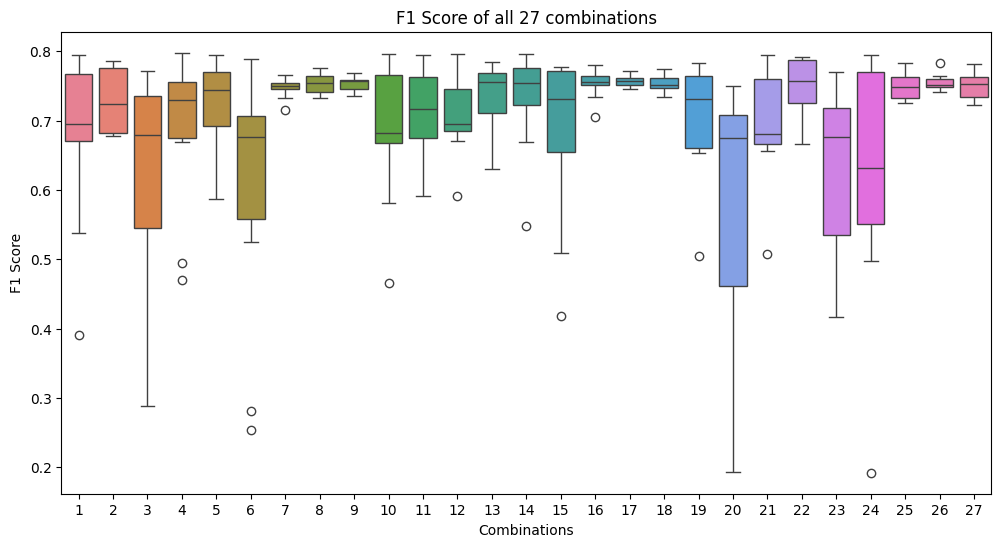

In [21]:
results = pd.DataFrame(grid_search.cv_results_)[['split0_test_f1_weighted', 'split1_test_f1_weighted', 'split2_test_f1_weighted', 'split3_test_f1_weighted', 'split4_test_f1_weighted', 'split5_test_f1_weighted', 'split6_test_f1_weighted', 'split7_test_f1_weighted', 'split8_test_f1_weighted', 'split9_test_f1_weighted']]
plt.figure(figsize=(12, 6))
models = pd.DataFrame([results[col] for col in results.columns])
sb.boxplot(models)
plt.title("F1 Score of all 27 combinations")
plt.xlabel('Combinations')
plt.ylabel('F1 Score')
plt.xticks(ticks=[i for i in range(27)], labels=[f'{i}' for i in range(1, 28)])
plt.show()

<h4>Get the best model & the best parameters</h4>

In [22]:
# Get the best model
best_model = grid_search.best_estimator_

# Get the best parameters
best_params = grid_search.best_params_

<h4>The best model parameters</h4>

In [23]:
best_params

{'alpha': 0.01, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}

<h4>Apply the best model on the test data</h4>

In [24]:
# Predicts the test data labels
predictions = pd.DataFrame(best_model.predict(X_test), columns=['labels'])

# Stores it on disk
predictions.to_csv('./Dataset/prediction_lr.csv', index=False)

<h1>Question no3</h1>
<h4>Works to do</h4>
<ul>
    <li>Design a new model based on Bayes model</li>
    <li>Train the model on the train data</li>
    <li>Visualize the results with plotting boxplots</li>
</ul>

<h4>Design new model</h4>

In [62]:
class NewBayesModel:
    def __init__(self, cat_indices):
        self.cat_indices = cat_indices
        self.num_indices = None
        self.gnb = GaussianNB()
        self.cnb = CategoricalNB()

    def fit(self, X, y):
        self.num_indices = [i for i in range(X.shape[1]) if i not in self.cat_indices]
        print(self.num_indices)


        # Separate the data
        X_num = X.iloc[:, self.num_indices]
        X_cat = X.iloc[:, self.cat_indices]
        print(X_cat)

        # Fit models
        self.gnb.fit(X_num, y)
        self.cnb.fit(X_cat, y)

    def predict(self, X):
        X_num = X[:, self.num_indices]
        X_cat = X[:, self.cat_indices]

        # Get probabilities
        num_probs = self.gnb.predict_proba(X_num)
        cat_probs = self.cnb.predict_proba(X_cat)

        # Combine by multiplying probabilities and predict class with highest probability
        combined_probs = num_probs * cat_probs
        predictions = np.argmax(combined_probs, axis=1)
        return predictions

In [63]:
# Prepare categorical features indices based on data set
cat_index = [1, 3, 5, 6, 7, 8, 9, 11]

# Define repeated k folds cross validation
rkf = RepeatedKFold(n_repeats=2, n_splits=5, random_state=1)

# Define data
y_train_mixed = pd.DataFrame(data_train['income'])
X_train_mixed = data_train.drop(columns=['income'])

# Train model
models = []
scores = []


for train_index, val_index in rkf.split(X_train_mixed, y_train_mixed):
    # Prepare folds
    X_train_fold, X_val_fold = X_train_mixed.iloc[train_index], X_train_mixed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_mixed.iloc[train_index], y_train_mixed.iloc[val_index]


    model = NewBayesModel(cat_index)
    model.fit(X_train_fold, y_train_fold)
    # predictions = copy.deepcopy(model.predict(X_val_fold))
    # score = {'accuracy': accuracy_score(y_true=y_val_fold, y_pred=predictions),
    #             'precision': precision_score(y_true=y_val_fold, y_pred=predictions, average='weighted'),
    #             'recall': recall_score(y_true=y_val_fold, y_pred=predictions, average='weighted'),
    #             'f1': f1_score(y_true=y_val_fold, y_pred=predictions, average='weighted')}
    # scores.append(copy.deepcopy(score))
    # models.append(copy.deepcopy(model))


[0, 2, 4, 10]
               workclass      education       marital-status  \
1                Private   Some-college   Married-civ-spouse   
2                Private        HS-grad   Married-civ-spouse   
3            Federal-gov           10th   Married-civ-spouse   
5              Local-gov      Bachelors   Married-civ-spouse   
8                Private      Assoc-voc        Never-married   
...                  ...            ...                  ...   
22787       Self-emp-inc      Bachelors   Married-civ-spouse   
22788                  ?        HS-grad   Married-civ-spouse   
22789            Private   Some-college   Married-civ-spouse   
22790   Self-emp-not-inc     Assoc-acdm             Divorced   
22791            Private      Doctorate        Never-married   

               occupation    relationship                 race gender  \
1        Transport-moving         Husband                White   Male   
2       Machine-op-inspct         Husband                White   Male  

e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no5\.env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: invalid literal for int() with base 10: ' Private'